In [1]:
#Doruk Ozer 70192
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
df = pd.read_csv('audi.csv', index_col=0) # let's data into dataframe df
df.head() # and take a look at the header of the data frame.
# define test set
training_set=df[4:84]
# define traingin set
test_set=df[84:]
test_set

,Sales,t,tsq,x1t,x2t,x3t,x4t,x5t,x6t,x7t,x8t,x9t,x10t,x11t,d1t,d2t,d3t,just
Month,,,,,,,,,,,,,,,,,,
85,625,85,7225,1,0,0,0,0,0,0,0,0,0,0,-197.0,741.0,907.0,0
86,702,86,7396,0,1,0,0,0,0,0,0,0,0,0,-2367.0,-197.0,741.0,0
87,1287,87,7569,0,0,1,0,0,0,0,0,0,0,0,77.0,-2367.0,-197.0,0
88,1673,88,7744,0,0,0,1,0,0,0,0,0,0,0,585.0,77.0,-2367.0,0
89,2109,89,7921,0,0,0,0,1,0,0,0,0,0,0,386.0,585.0,77.0,0
90,2177,90,8100,0,0,0,0,0,1,0,0,0,0,0,436.0,386.0,585.0,0
91,137,91,8281,0,0,0,0,0,0,1,0,0,0,0,68.0,436.0,386.0,0
92,1055,92,8464,0,0,0,0,0,0,0,1,0,0,0,-2040.0,68.0,436.0,0
93,1352,93,8649,0,0,0,0,0,0,0,0,1,0,0,918.0,-2040.0,68.0,0


In [3]:
# regression with trend terms t,tsq,indicators (dummies) for months and differences at lag 1 , lag 2, lag 3 , 
lm = sm.OLS.from_formula('Sales ~ t + tsq + x1t + x2t+ x3t+ x4t+ x5t+ x6t+ x7t+ x8t +x9t + x10t+x11t + d1t +d2t+d3t ', training_set) #  linear regression for Sales train with the equation in the lab manual 
result = lm.fit() # results of the  regression
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     4.374
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.52e-05
Time:                        13:04:29   Log-Likelihood:                -608.92
No. Observations:                  80   AIC:                             1250.
Df Residuals:                      64   BIC:                             1288.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1008.8371    268.854      3.752      0.000     471.740    1545.935
t              9.7748     11.890      0.822      0.414     -13.977      33.527
tsq            0.0363      0.130      0.278      0.782      -0.224       0.297
x1t        -1079.3362    270.674     -3.988      0.000   -1620.070    -538.602
x2t         -687.3672    298.357     -2.304      0.024   -1283.403     -91.332
x3t         -276.2931    305.490     -0.904      0.369    -886.580     333.994
x4t           92.8344    302.138      0.307      0.760    -510.756     696.425
x5t         -194.7095    260.536     -0.747      0.458    -715.190     325.771
x6t         -559.2440    260.950     -2.143      0.036   -1080.551     -37.937
x7t         -501.8057    264.309     -1.899      0.062   -1029.824      26.213
x8t         -517.2080    271.300     -1.906      0.061   -1059.192      24.776
x9t         -249.5339    271.536     -0.919      0.362    -791.990     292.922
x10t        -336.0381    257.656     -1.304      0.197    -850.765     178.689
x11t        -4.23e-14   4.52e-14     -0.935      0.353   -1.33e-13    4.81e-14
d1t            0.2665      0.116      2.288      0.025       0.034       0.499
d2t            0.2106      0.126      1.676      0.099      -0.040       0.462
d3t            0.1729      0.119      1.457      0.150      -0.064       0.410
==============================================================================
Omnibus:                       11.020   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               22.399
Skew:                          -0.381   Prob(JB):                     1.37e-05
Kurtosis:                       5.478   Cond. No.                     3.66e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.44e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [4]:
#R^2 is 0.5 which means the %50 of the training data is able to be predicted preceisly 
#According to P>|t| values t and tsq values together are statistically insignificant. It may indicate that there might be no trend in the dataset so there is no trend term
# is necessary for this prediction or it may also indicate that only one of the trend term is enough to predict the trend if it exists so one of them can be discarded.
# In other words, t and tsq can be creating an autocorrolation so that one of them could be eliminated by Lasso or Rigid or there might be no trend terms in the data
# Monthly dummies at month 3, month 4, month 5, month 9, month 10, month 11  are statistically insignificant 
# Lastly, difference term at lag 3 is statistically insignificant


MSE1= np.mean(np.square(result.resid)) # retrieve the residuals: e_t= y_t-yhat_t
RMSE1 = np.sqrt(MSE1) # and compute the usual error measures
print('MSE of Training Set =', MSE1)
print('RMSE of Training Set =', RMSE1)

MSE of Training Set = 239239.0648734208
RMSE of Training Set = 489.1207058318231


In [5]:
# Use the  model estimated at trainging set on the test set 
result2=result.predict(test_set)
# the residuals on the test set
resids_test1=test_set.iloc[:,1] - result2
#MSE MAPE RMSE on the test set.
mse_test1= np.mean(np.square(resids_test1))
rmse_test1 = np.sqrt(mse_test1)
print('MSE Test  =', mse_test1)
print('RMSE Test =', rmse_test1 )

MSE Test  = 3468989.776754342
RMSE Test = 1862.522423154777


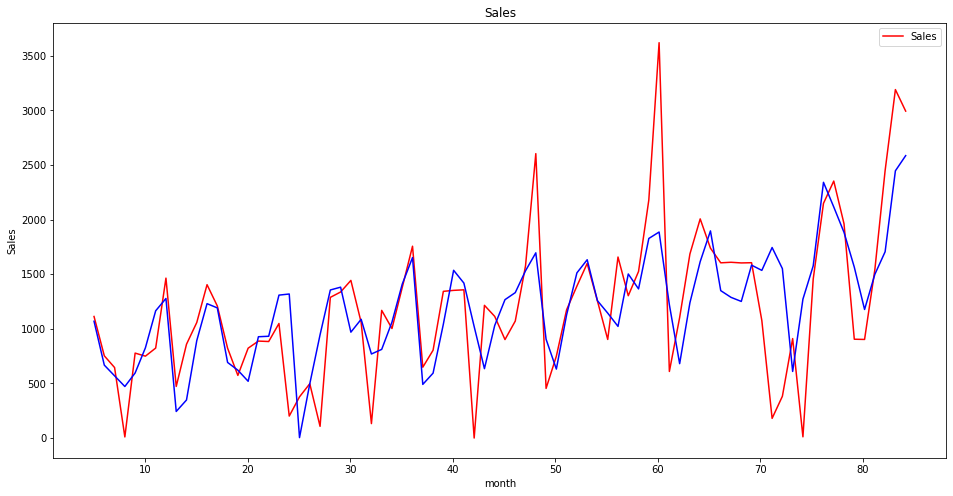

In [6]:
time_axis = np.linspace(1,500,499)
plt.figure(figsize = (16, 8))
plt.plot(time_axis[4:84],np.array(training_set.iloc[:,0]), 'r')
plt.plot(time_axis[4:84], result.get_prediction().predicted_mean, 'b')
plt.xlabel("month")
plt.ylabel("Sales")
plt.title("Sales")
plt.legend(['Sales'])
plt.show()

In [7]:
# for the implementation of lasso, the conversion of the dataframe
y_train=np.array(df.iloc[4:84,0])
y_test = np.array(df.iloc[84:,0])
x_train=np.array(df.iloc[4:84,1:17])
x_test=np.array(df.iloc[84:,1:17])

In [8]:
#experiment with different alpha parametes
alphas = np.linspace(0.1,5,100)
alphas

array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444, 0.69393939, 0.74343434, 0.79292929,
       0.84242424, 0.89191919, 0.94141414, 0.99090909, 1.04040404,
       1.08989899, 1.13939394, 1.18888889, 1.23838384, 1.28787879,
       1.33737374, 1.38686869, 1.43636364, 1.48585859, 1.53535354,
       1.58484848, 1.63434343, 1.68383838, 1.73333333, 1.78282828,
       1.83232323, 1.88181818, 1.93131313, 1.98080808, 2.03030303,
       2.07979798, 2.12929293, 2.17878788, 2.22828283, 2.27777778,
       2.32727273, 2.37676768, 2.42626263, 2.47575758, 2.52525253,
       2.57474747, 2.62424242, 2.67373737, 2.72323232, 2.77272727,
       2.82222222, 2.87171717, 2.92121212, 2.97070707, 3.02020202,
       3.06969697, 3.11919192, 3.16868687, 3.21818182, 3.26767677,
       3.31717172, 3.36666667, 3.41616162, 3.46565657, 3.51515152,
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a pre

Text(0, 0.5, 'weights')

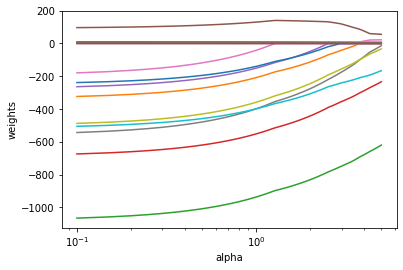

In [9]:
lasso = Lasso(max_iter=70000, normalize=True) # let's normalize the data so that all predictors are of the same scale
coefs = [] # we'll collect the lasso coefficients, the mse in the test set and the mse in the training set for each value of alpha
mses = []
msetrains=[]
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)   # this implements the lasso with the above value of alpha=a for the training set
    coefs.append(lasso.coef_) # recovers the coefficients of the predictors
    mse_test=mean_squared_error(y_test, lasso.predict(x_test)) # the MSE in the test set
    mse_train=mean_squared_error(y_train, lasso.predict(x_train)) # the MSE in the training set
    mses.append(mse_test)   
    msetrains.append(mse_train)   

# plot the coefficients of predictors as a function of alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# we see in the figure below that some of the predictors' coefficients rapidly shrink to zero while others stay non-zero

In [10]:
# If we set alpha = alpha[0], we expect all predictors' cefficients to take values to similar to the full regression
lasso.set_params(alpha=alphas[0])
lasso.fit(x_train, y_train)
print(lasso.coef_)
mse_test=mean_squared_error(y_test, lasso.predict(x_test))
print('MSE (test)=', mse_test)
print('RMSE (test)=', np.sqrt(mse_test))


[ 9.74302380e+00  3.64236560e-02 -1.06508653e+03 -6.73807983e+02
 -2.63743222e+02  9.65451093e+01 -1.79414878e+02 -5.43171407e+02
 -4.87469493e+02 -5.05369629e+02 -2.38547327e+02 -3.23257912e+02
  0.00000000e+00  2.64988101e-01  2.07963569e-01  1.68851330e-01]
MSE (test)= 1036090.5147214042
RMSE (test)= 1017.8853151123677


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [11]:
# If we set alpha = alpha[20], we see that predictor 13 is eliminated. The resulting test RMSE is lower than full regression!
lasso.set_params(alpha=alphas[20])
lasso.fit(x_train, y_train)
print(lasso.coef_)
mse_test=mean_squared_error(y_test, lasso.predict(x_test))
print('MSE (test)=', mse_test)
print('RMSE (test)=', np.sqrt(mse_test))

[ 9.20138456e+00  4.04023176e-02 -9.23642936e+02 -5.39413552e+02
 -1.39331746e+02  1.33621174e+02 -2.80005569e+01 -3.84091809e+02
 -3.45704845e+02 -3.88355250e+02 -1.29928970e+02 -1.96785240e+02
  0.00000000e+00  2.49712158e-01  1.81616284e-01  1.29076228e-01]
MSE (test)= 1041783.5157051712
RMSE (test)= 1020.6779686586613


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [12]:
# If we set alpha = alpha[40], we see that predictors 7,and 13, are eliminated. The resulting test RMSE is lower than the case at alpha equal to alpha[20]!
lasso.set_params(alpha=alphas[40])
lasso.fit(x_train, y_train)
print(lasso.coef_)
mse_test=mean_squared_error(y_test, lasso.predict(x_test))
print('MSE (test)=', mse_test)
print('RMSE (test)=', np.sqrt(mse_test))

[ 8.66977215e+00  4.30657579e-02 -8.24011932e+02 -4.34623799e+02
 -4.13004604e+01  1.35118444e+02  0.00000000e+00 -2.67744113e+02
 -2.37132526e+02 -3.00461965e+02 -5.17208918e+01 -1.06420034e+02
  0.00000000e+00  2.45151200e-01  1.66418825e-01  9.43508319e-02]
MSE (test)= 1030861.5401369585
RMSE (test)= 1015.3135181494229


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [13]:
# If we set alpha = alpha[70], we see that predictors 5, 11 and 13 are eliminated. The resulting test RMSE is lower than the case at alpha equal to alpha[40]!
# it is the best alpha since aplpha[80] increases the test RMSE. 
lasso.set_params(alpha=alphas[70])
lasso.fit(x_train, y_train)
print(lasso.coef_)
mse_test=mean_squared_error(y_test, lasso.predict(x_test))
print('MSE (test)=', mse_test)
print('RMSE (test)=', np.sqrt(mse_test))

mse_test2=mean_squared_error(y_train, lasso.predict(x_train))
print('MSE (train)=', mse_test2)
print('RMSE (train)=', np.sqrt(mse_test2))

[ 7.96451607e+00  4.59178243e-02 -7.09334079e+02 -3.17212056e+02
 -0.00000000e+00  9.49474593e+01  2.23224801e+00 -1.22305693e+02
 -1.15447433e+02 -2.18478784e+02 -0.00000000e+00 -1.21843266e+01
  0.00000000e+00  2.30245824e-01  1.24242743e-01  3.59300527e-02]
MSE (test)= 1021609.5591106722
RMSE (test)= 1010.7470302259968
MSE (train)= 266375.2583542037
RMSE (train)= 516.1155474835105


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [14]:
# If we set alpha = alpha[80], we see that predictors 5, 11, 12 ,13 are eliminated. 
# The resulting test RMSE is higher than the case alpha[70]
lasso.set_params(alpha=alphas[80])
lasso.fit(x_train, y_train)
print(lasso.coef_)
mse_test=mean_squared_error(y_test, lasso.predict(x_test))
print('MSE (test)=', mse_test)
print('RMSE (test)=', np.sqrt(mse_test))

[ 7.71633717e+00  4.72234268e-02 -6.74977321e+02 -2.85040262e+02
 -0.00000000e+00  7.28798729e+01  1.56873904e+01 -7.54294563e+01
 -8.08850882e+01 -2.00655905e+02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  2.21449226e-01  1.03889024e-01  1.22258328e-02]
MSE (test)= 1026027.3204692658
RMSE (test)= 1012.9300669193633


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


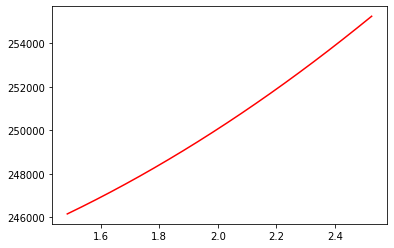

In [15]:
# we can plot the MSEs in the training set: as alpha increases, the training MSE increases but only by a small amount
plt.plot(alphas[28:50], msetrains[28:50], 'r')

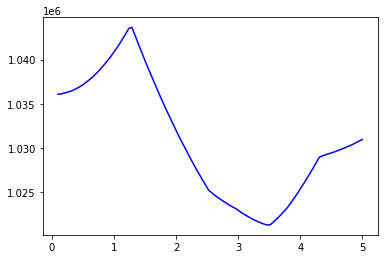

In [16]:
# we can also plot the MSEs in the test set
plt.plot(alphas, mses, 'b')
# we see that the MSE in the test set first decreases but then increases again
# there is a tradeoff between the number of predictors and the test MSE

In [17]:
#Finding optimal alpha 
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(x_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
mse_lasso1=mean_squared_error(y_test, lasso.predict(x_test))
rmse_lasso1=np.sqrt(mse_lasso1)
print('Best lambda for lasso =' , lassocv.alpha_)  # Calculate the test MSE
print('Test MSE for lasso' , mse_lasso1)  # Calculate the test MSE
print('Test RMSE for lasso' , np.sqrt(mse_lasso1)) # Calculate the test MSE

Best lambda for lasso = 1.961596534702787
Test MSE for lasso 1032560.8772303419
Test RMSE for lasso 1016.1500269302471


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a pre

In [18]:
# the coefficients for the best cross-validated alpha (lambda) from above
# predictor 7 and 13 is eliminated
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print(lasso.coef_)
mse_test=mean_squared_error(y_test, lasso.predict(x_test))
print('MSE (test)=', mse_test)
print('RMSE (test)=', np.sqrt(mse_test))

[ 8.73258833e+00  4.27875326e-02 -8.34775195e+02 -4.46334157e+02
 -5.22911475e+01  1.35904135e+02  0.00000000e+00 -2.80479277e+02
 -2.49197911e+02 -3.10168454e+02 -6.02359047e+01 -1.16232185e+02
  0.00000000e+00  2.45405222e-01  1.67931197e-01  9.83604035e-02]
MSE (test)= 1032560.8772303419
RMSE (test)= 1016.1500269302471


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [19]:
#full regression tree with max depth 3
regr_tree_frd = DecisionTreeRegressor(max_depth = 3, random_state=1)

#check the error performance on the train and test sets
result_fittree=regr_tree_frd.fit(x_train, y_train)
pred_tree_train = regr_tree_frd.predict(x_train)
mse_tree_train=mean_squared_error(y_train, pred_tree_train)
rmse_tree_train=np.sqrt(mse_tree_train)
pred_tree_test = regr_tree_frd.predict(x_test)
mse_tree_test= mean_squared_error(y_test, pred_tree_test)
rmse_tree_test=np.sqrt(mse_tree_test)
print('RMSE Tree Train = ', rmse_tree_train)
print('RMSE Tree Test = ', rmse_tree_test)

RMSE Tree Train =  508.06616766814574
RMSE Tree Test =  1976.3690191864473


In [20]:
#full regression tree with max depth 4
regr_tree_frd = DecisionTreeRegressor(max_depth = 4, random_state=1)

#check the error performance on the train and test sets
result_fittree=regr_tree_frd.fit(x_train, y_train)
pred_tree_train = regr_tree_frd.predict(x_train)
mse_tree_train=mean_squared_error(y_train, pred_tree_train)
rmse_tree_train=np.sqrt(mse_tree_train)
pred_tree_test = regr_tree_frd.predict(x_test)
mse_tree_test= mean_squared_error(y_test, pred_tree_test)
rmse_tree_test=np.sqrt(mse_tree_test)
print('RMSE Tree Train = ', rmse_tree_train)
print('RMSE Tree Test = ', rmse_tree_test)

RMSE Tree Train =  439.76594926843177
RMSE Tree Test =  1654.1580184492652


In [21]:
#full regression tree with max depth 5
regr_tree_frd = DecisionTreeRegressor(max_depth = 5, random_state=1)

#check the error performance on the train and test sets
result_fittree=regr_tree_frd.fit(x_train, y_train)
pred_tree_train = regr_tree_frd.predict(x_train)
mse_tree_train=mean_squared_error(y_train, pred_tree_train)
rmse_tree_train=np.sqrt(mse_tree_train)
pred_tree_test = regr_tree_frd.predict(x_test)
mse_tree_test= mean_squared_error(y_test, pred_tree_test)
rmse_tree_test=np.sqrt(mse_tree_test)
print('RMSE Tree Train = ', rmse_tree_train)
print('RMSE Tree Test = ', rmse_tree_test)

RMSE Tree Train =  360.8102356094971
RMSE Tree Test =  2053.6472128873547


In [22]:
#full regression tree with max depth 8
regr_tree_frd = DecisionTreeRegressor(max_depth = 8, random_state=1)

#check the error performance on the train and test sets
result_fittree=regr_tree_frd.fit(x_train, y_train)
pred_tree_train = regr_tree_frd.predict(x_train)
mse_tree_train=mean_squared_error(y_train, pred_tree_train)
rmse_tree_train=np.sqrt(mse_tree_train)
pred_tree_test = regr_tree_frd.predict(x_test)
mse_tree_test= mean_squared_error(y_test, pred_tree_test)
rmse_tree_test=np.sqrt(mse_tree_test)
print('RMSE Tree Train = ', rmse_tree_train)
print('RMSE Tree Test = ', rmse_tree_test)

RMSE Tree Train =  122.88791725931941
RMSE Tree Test =  1493.7126564369735


In [23]:
#full regression tree with max depth 12
regr_tree_frd = DecisionTreeRegressor(max_depth = 12, random_state=1)

#check the error performance on the train and test sets
result_fittree=regr_tree_frd.fit(x_train, y_train)
pred_tree_train = regr_tree_frd.predict(x_train)
mse_tree_train=mean_squared_error(y_train, pred_tree_train)
rmse_tree_train=np.sqrt(mse_tree_train)
pred_tree_test = regr_tree_frd.predict(x_test)
mse_tree_test= mean_squared_error(y_test, pred_tree_test)
rmse_tree_test=np.sqrt(mse_tree_test)
print('RMSE Tree Train = ', rmse_tree_train)
print('RMSE Tree Test = ', rmse_tree_test)

RMSE Tree Train =  0.15811388300841897
RMSE Tree Test =  1493.7126564369735


In [24]:
#full regression tree with max depth 16
regr_tree_frd = DecisionTreeRegressor(max_depth = 16, random_state=1)

#check the error performance on the train and test sets
result_fittree=regr_tree_frd.fit(x_train, y_train)
pred_tree_train = regr_tree_frd.predict(x_train)
mse_tree_train=mean_squared_error(y_train, pred_tree_train)
rmse_tree_train=np.sqrt(mse_tree_train)
pred_tree_test = regr_tree_frd.predict(x_test)
mse_tree_test= mean_squared_error(y_test, pred_tree_test)
rmse_tree_test=np.sqrt(mse_tree_test)
print('RMSE Tree Train = ', rmse_tree_train)
print('RMSE Tree Test = ', rmse_tree_test)

RMSE Tree Train =  0.0
RMSE Tree Test =  1826.123444166175


In [25]:
# Bagging: using all features
# We can use a random forest with m=p which implies bagging with all
# predictors. To do that set max_features = 16

bagged_tree = RandomForestRegressor(max_features = 16, random_state = 1)
bagged_tree.fit(x_train, y_train)
pred_bagged_train = bagged_tree.predict(x_train)
pred_bagged_test = bagged_tree.predict(x_test)
mse_bagged_train=mean_squared_error(y_train, pred_bagged_train)
rmse_bagged_train=np.sqrt(mse_bagged_train )
mse_bagged_test=mean_squared_error(y_test, pred_bagged_test)
rmse_bagged_test=np.sqrt(mse_bagged_test)
print('RMSE Bagged Train = ', rmse_bagged_train)
print('RMSE Bagged Test = ', rmse_bagged_test)

RMSE Bagged Train =  234.22878918111238
RMSE Bagged Test =  1185.6212011290395


RMSE Forest Train =  207.68283825041974
RMSE Forest Test =  954.0762165331272


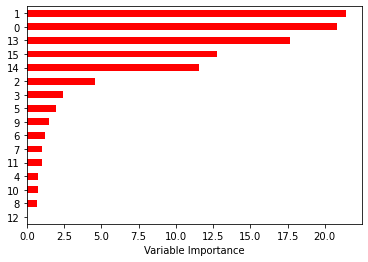

In [26]:
# Random forests: using 2 features
# It gives the best performance at the test set
random_forest_frd = RandomForestRegressor(max_features = 2, random_state = 1)
random_forest_frd.fit(x_train, y_train)
pred_forest_train = random_forest_frd.predict(x_train)
pred_forest_test = random_forest_frd.predict(x_test)
mse_forest_train=mean_squared_error(y_train, pred_forest_train)
rmse_forest_train=np.sqrt(mse_forest_train )
mse_forest_test=mean_squared_error(y_test, pred_forest_test)
rmse_forest_test=np.sqrt(mse_forest_test)
print('RMSE Forest Train = ', rmse_forest_train)
print('RMSE Forest Test = ', rmse_forest_test)
Importance = pd.DataFrame({'Importance':random_forest_frd.feature_importances_*100}, 
                          )

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [27]:
# Random forests: using 3 features
random_forest_frd = RandomForestRegressor(max_features = 3, random_state = 1)
random_forest_frd.fit(x_train, y_train)
pred_forest_train = random_forest_frd.predict(x_train)
pred_forest_test = random_forest_frd.predict(x_test)
mse_forest_train=mean_squared_error(y_train, pred_forest_train)
rmse_forest_train=np.sqrt(mse_forest_train )
mse_forest_test=mean_squared_error(y_test, pred_forest_test)
rmse_forest_test=np.sqrt(mse_forest_test)
print('RMSE Forest Train = ', rmse_forest_train)
print('RMSE Forest Test = ', rmse_forest_test)

RMSE Forest Train =  226.24874629763144
RMSE Forest Test =  1131.9222700860103


In [28]:
# Random forests: using 5 features
random_forest_frd = RandomForestRegressor(max_features = 5, random_state = 1)
random_forest_frd.fit(x_train, y_train)
pred_forest_train = random_forest_frd.predict(x_train)
pred_forest_test = random_forest_frd.predict(x_test)
mse_forest_train=mean_squared_error(y_train, pred_forest_train)
rmse_forest_train=np.sqrt(mse_forest_train )
mse_forest_test=mean_squared_error(y_test, pred_forest_test)
rmse_forest_test=np.sqrt(mse_forest_test)
print('RMSE Forest Train = ', rmse_forest_train)
print('RMSE Forest Test = ', rmse_forest_test)


RMSE Forest Train =  213.00938599625135
RMSE Forest Test =  1201.4377678726576


In [29]:
# Random forests: using 7 features
random_forest_frd = RandomForestRegressor(max_features = 7, random_state = 1)
random_forest_frd.fit(x_train, y_train)
pred_forest_train = random_forest_frd.predict(x_train)
pred_forest_test = random_forest_frd.predict(x_test)
mse_forest_train=mean_squared_error(y_train, pred_forest_train)
rmse_forest_train=np.sqrt(mse_forest_train )
mse_forest_test=mean_squared_error(y_test, pred_forest_test)
rmse_forest_test=np.sqrt(mse_forest_test)
print('RMSE Forest Train = ', rmse_forest_train)
print('RMSE Forest Test = ', rmse_forest_test)

RMSE Forest Train =  224.70599769754702
RMSE Forest Test =  1186.6855809599833


In [30]:
# Random forests: using 9 features
random_forest_frd = RandomForestRegressor(max_features = 9, random_state = 1)
random_forest_frd.fit(x_train, y_train)
pred_forest_train = random_forest_frd.predict(x_train)
pred_forest_test = random_forest_frd.predict(x_test)
mse_forest_train=mean_squared_error(y_train, pred_forest_train)
rmse_forest_train=np.sqrt(mse_forest_train )
mse_forest_test=mean_squared_error(y_test, pred_forest_test)
rmse_forest_test=np.sqrt(mse_forest_test)
print('RMSE Forest Train = ', rmse_forest_train)
print('RMSE Forest Test = ', rmse_forest_test)

RMSE Forest Train =  225.9853905952772
RMSE Forest Test =  1183.9571196556628


In [31]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.01, 
                                           max_depth = 2, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  972.4483447974144


In [32]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.001, 
                                           max_depth = 2, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  909.5495663595459


In [33]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.01, 
                                           max_depth = 3, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)


RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  953.8020217973688


RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  909.4337301725599


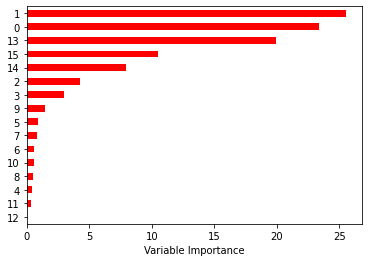

In [34]:
#boosted aprroaches with different depth and learning rates
# It gives the best performance at test set.
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.001, 
                                           max_depth = 3, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

Importance = pd.DataFrame({'Importance':random_forest_frd.feature_importances_*100}, 
                          )

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [35]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.0001, 
                                           max_depth = 3, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  917.2031972616264


In [36]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.01, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  1017.3347662324359


In [37]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.001, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  909.5583320019914


In [38]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.0001, 
                                           max_depth = 4, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  917.2007371781542


In [39]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.01, 
                                           max_depth = 5, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  1057.9194947245885


In [40]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.001, 
                                           max_depth = 5, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  909.6440059740291


In [41]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.0001, 
                                           max_depth = 5, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  917.1915732595638


In [42]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.01, 
                                           max_depth = 6, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  1051.2414991101832


In [43]:
#boosted aprroaches with different depth and learning rates
boosted_frd = GradientBoostingRegressor(n_estimators = 50, 
                                           learning_rate = 0.01, 
                                           max_depth = 7, 
                                           random_state = 1)

boosted_frd.fit(x_train, y_train)
pred_boosted_train = boosted_frd.predict(x_train)
pred_boosted_test = boosted_frd.predict(x_test)
mse_boosted_train=mean_squared_error(y_train, pred_boosted_train)
rmse_boosted_train=np.sqrt(mse_forest_train )
mse_boosted_test=mean_squared_error(y_test, pred_boosted_test)
rmse_boosted_test=np.sqrt(mse_boosted_test)
print('RMSE Boosted Train = ', rmse_boosted_train)
print('RMSE Boosted Test = ', rmse_boosted_test)

RMSE Boosted Train =  225.9853905952772
RMSE Boosted Test =  1052.5351322154768
